In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [177]:
# GD&T Callout
target = 1.2
tolerance = 0.005

In [178]:
upper_tol = target + tolerance
lower_tol = target - tolerance

In [179]:
measurement_data = pd.read_excel('../data/line measurements.xlsx')

In [180]:
measurement_data.columns

Index(['Measurement Number', 'Measurement'], dtype='object')

In [181]:
meas_num = measurement_data['Measurement Number']
meas = measurement_data.Measurement

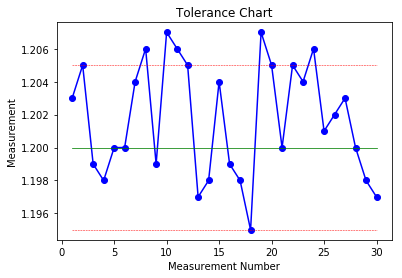

In [182]:
measurement_data['target'] = target
measurement_data['upper_tol'] = upper_tol
measurement_data['lower_tol'] = lower_tol

plt.plot(meas_num, meas, color='b', marker='o')
plt.plot(meas_num, measurement_data['target'], color='g', linewidth=0.75)
plt.plot(meas_num, measurement_data['upper_tol'], color='r', linewidth=0.5, linestyle='dashed')
plt.plot(meas_num, measurement_data['lower_tol'], color='r', linewidth=0.5, linestyle='dashed')
plt.xlabel('Measurement Number')
plt.ylabel('Measurement')
plt.title('Tolerance Chart')
plt.show()

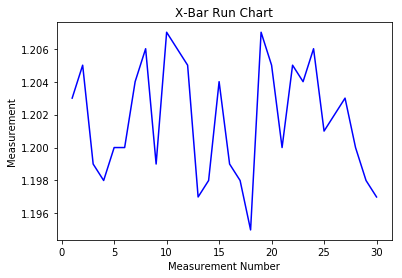

In [183]:
plt.plot(meas_num, meas, color='b')
plt.xlabel('Measurement Number')
plt.ylabel('Measurement')
plt.title('X-Bar Run Chart')
plt.show()

In [184]:
# Statistics
avg = np.average(meas)
measurement_data['avg'] = avg

std = np.std(meas)

In [185]:
upper_1 = avg + std*1
upper_2 = avg + std*2
upper_3 = avg + std*3

lower_1 = avg - std*1
lower_2 = avg - std*2
lower_3 = avg - std*3

measurement_data['upper_1'] = avg + std*1
measurement_data['upper_2'] = avg + std*2
measurement_data['upper_3'] = avg + std*3

measurement_data['lower_1'] = avg - std*1
measurement_data['lower_2'] = avg - std*2
measurement_data['lower_3'] = avg - std*3

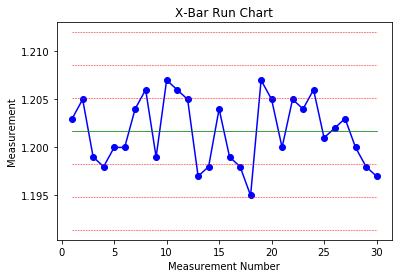

1.2119805641868528
1.208553709457902
1.205126854728951
1.2017000000000002
1.1982731452710493
1.1948462905420985
1.1914194358131476


In [186]:
plt.plot(meas_num, meas, color='b', marker='o')
plt.plot(meas_num, measurement_data['avg'], linestyle='solid', linewidth=0.75, color='g')
plt.plot(meas_num, measurement_data['upper_1'], linestyle='dashed', linewidth=0.5, color='r')
plt.plot(meas_num, measurement_data['upper_2'], linestyle='dashed', linewidth=0.5, color='r')
plt.plot(meas_num, measurement_data['upper_3'], linestyle='dashed', linewidth=0.5, color='r')
plt.plot(meas_num, measurement_data['lower_1'], linestyle='dashed', linewidth=0.5, color='r')
plt.plot(meas_num, measurement_data['lower_2'], linestyle='dashed', linewidth=0.5, color='r')
plt.plot(meas_num, measurement_data['lower_3'], linestyle='dashed', linewidth=0.5, color='r')
plt.xlabel('Measurement Number')
plt.ylabel('Measurement')
plt.title('X-Bar Run Chart')
plt.show()
print(upper_3)
print(upper_2)
print(upper_1)
print(avg)
print(lower_1)
print(lower_2)
print(lower_3)

## Rules
1. None beyond limits (Outlier)
2. 2 out of 3 consecutive in outer region 
3. 4 out of 5 consecutive in middle region or beyond
4. 7 or more consecutive on same side of average
5. 7 consecutive trending same direction (trend)
6. 8 consecutive with no outer region (Mixture)
7. 15 consecutive in inner region (stratification)
8. 14 consecutive alternative up and down around average (over control)

In [187]:
errors = set()
errors.clear

<function set.clear>

In [188]:
differentials_to_target = meas - target
differentials_to_avg = meas - avg
first_differences = np.ediff1d(meas)

In [189]:
### Tolerances
if np.max(np.absolute(differentials_to_target)) > tolerance:
    errors.add("Dimensions are out of tolerance")

In [190]:
### Outliers

absolute_differentials = np.absolute(differentials_to_avg)

if np.max(absolute_differentials) > upper_3:
    errors.add("Outliers Exist")
errors

{'Dimensions are out of tolerance'}

In [191]:
### Outer Regions

for index, i in enumerate(absolute_differentials):
    if index < 2:
        continue
    count = np.count_nonzero(absolute_differentials[index-2:index+1] > (std*2))
    if count >= 2:
            errors.add("Outer Zone Clusters")
errors

{'Dimensions are out of tolerance'}

In [192]:
### Middle Regions

for index, i in enumerate(absolute_differentials):
    if index < 4:
        continue
    count = np.count_nonzero(absolute_differentials[index-4:index+1] > (std*1))
    if count >= 4:
            errors.add("Middle Zone Clusters")
errors

{'Dimensions are out of tolerance', 'Middle Zone Clusters'}

In [193]:
### Inner Regions

for index, i in enumerate(absolute_differentials):
    if index < 6:
        continue
    count = np.count_nonzero(differentials_to_target[index-6:index+1] > 0)
    if count >= 7:
            errors.add("Inner Zone Clusters")
    count = np.count_nonzero(differentials_to_target[index-6:index+1] < 0)
    if count >= 7:
            errors.add("Inner Zone Clusters")
errors

{'Dimensions are out of tolerance', 'Middle Zone Clusters'}

In [194]:
### Trends

for index, i in enumerate(first_differences):
    if index < 5:
        continue
    count = np.count_nonzero(first_differences[index-5:index+1] > 0)
    if count >= 6:
        errors.add("Trending Data is Present")
    count = np.count_nonzero(first_differences[index-5:index+1] < 0)
    if count >= 6:
        errors.add("Trending Data is Present")
    
errors

{'Dimensions are out of tolerance', 'Middle Zone Clusters'}

In [195]:
### Mixture

for index, i in enumerate(absolute_differentials):
    if index < 7:
        continue
    count = np.count_nonzero(absolute_differentials[index-7:index+1] > upper_3)
    if count == 0:
        errors.add("No Mixture")
errors

{'Dimensions are out of tolerance', 'Middle Zone Clusters', 'No Mixture'}

In [196]:
### Stratification

for index, i in enumerate(absolute_differentials):
    if index < 14:
        continue
    count = np.count_nonzero(absolute_differentials[index-14:index+1] > upper_1)
    if count == 0:
        errors.add("No Stratification")
errors

{'Dimensions are out of tolerance',
 'Middle Zone Clusters',
 'No Mixture',
 'No Stratification'}

In [197]:
### Over-Control

def sign_change(a, b):
    if a > 0 and b > 0:
        return 0
    elif a < 0 and b < 0:
        return 0
    else:
        return 1 

changes = []

for index, i in enumerate(first_differences):
    if index == 0:
        continue
    change = sign_change(first_differences[index],first_differences[index-1])
    changes.append(change)

for index, i in enumerate(changes):
    if index < 12:
        continue
    if np.array(changes[index-12:index+1]).sum() >= 13:
        errors.add("Over Control")
errors

{'Dimensions are out of tolerance',
 'Middle Zone Clusters',
 'No Mixture',
 'No Stratification'}